# Introduction to Data Visualization with ggplot2
link: https://www.datacamp.com/search?facets%5Btechnology%5D%5B%5D=r&facets%5Btopic%5D%5B%5D=Data+Visualization&tab=courses

course: https://www.datacamp.com/courses/introduction-to-data-visualization-with-ggplot2

### Course Description
The ability to produce meaningful and beautiful data visualizations is an essential part of your skill set as a data scientist. This course, the first R data visualization tutorial in the series, introduces you to the principles of good visualizations and the grammar of graphics plotting concepts implemented in the ggplot2 package. ggplot2 has become the go-to tool for flexible and professional plots in R. Here, we’ll examine the first three essential layers for making a plot - Data, Aesthetics and Geometries. By the end of the course you will be able to make complex exploratory plots.


### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 

https://www.tablesgenerator.com/markdown_tables


other: Book: machine learning with R by Brett Lantz
Learn about `attr` function


Laying out multiple plots on a page:  https://cran.r-project.org/web/packages/egg/vignettes/Ecosystem.html

### Note 3 - DataFrames

We have troubles in the moment to load our dataset but if we used `gascon(url())` or onlye `url()` we can do that.

In [1]:
#diamons
load(file = gzcon(url("https://assets.datacamp.com/production/repositories/5171/datasets/ca796c3f86ee883c59e31bd6272ee81841cb7f54/diamonds.RData")))
#iris
load(file = url("https://assets.datacamp.com/production/repositories/5171/datasets/ffb99ce839b696b5a8102c8015b6db7060b360fe/iris.RData"))
#Recession
load(file = url("https://assets.datacamp.com/production/repositories/5171/datasets/98df1f3a8e599cbabd16ea2a21d8f74c0d02290d/recess.RData"))
#Fish
load(file = url("https://assets.datacamp.com/production/repositories/5171/datasets/fd66a8c2408f8cccc24df8ce2668e0e195519532/fish.RData"))

## 1) Introduction
In this chapter we’ll get you into the right frame of mind for developing meaningful visualizations with R. You’ll understand that as a communications tool, visualizations require you to think about your audience first. You’ll also be introduced to the basics of ggplot2 - the 7 different grammatical elements (layers) and aesthetic mappings.

### 1.1) (video) Introduction
Data Visualization is a essential skill for a data scientist and it's important to distinguish between exploratory and explanatory visualization

#### 1.1.1) Data columns types affect plot types
One of the most typical problems when plotting is to take the correct type of variable, for example, we will work with the `mtcars` data set and plot on the` cyl` variable, but we could obtain two possible results, in one of them our variable it is handled as a continuous variable and in the other case it is a categorical variable

**`factor()` allow us to change to categorical variable **

In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)
data(mtcars)

mtcars$fcyl<-factor(mtcars$cyl, levels = c("4","6","8"))
mtcars$fam<-factor(mtcars$am, labels = c("automatic","manual"),  levels  = c (1,0))


Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'gridExtra' was built under R version 3.5.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



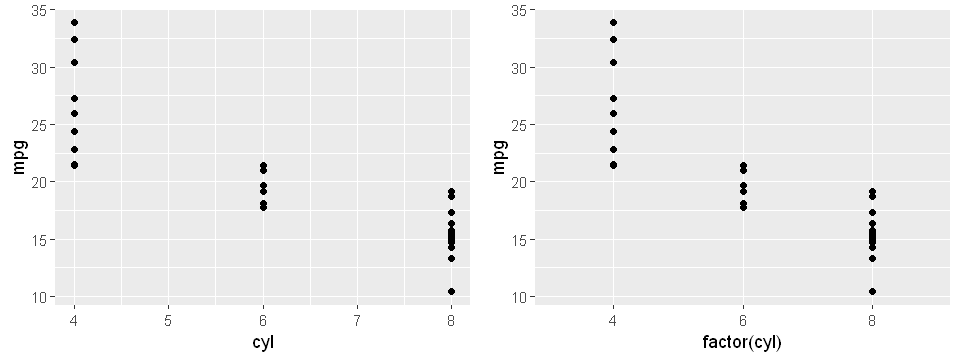

In [26]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=8, repr.plot.height=3)

a1<-ggplot(mtcars, aes(x= cyl, y=mpg)) + geom_point()
a2<-ggplot(mtcars, aes(x= factor(cyl), y=mpg)) + geom_point()
grid.arrange(a1, a2, nrow = 1)


### 1.2) (video) The grammar of graphics
the first step in thinking creatively about graphic visualization is to appreciate that graphic are built upon an underlying grammar.

There are 3 essential grammatical elements:

- `Data` : the data-set being plotted.
- `Aesthetics` : the scales onto which we map our daa.
- `Geometries` the visual elements used for our data
- (optinal) `Themes` : all non-data ink

### 1.3) (video) ggplot2 layers
Now that you know about graphic grammar, we will see how works, it's implemented in R using ggplot2

#### 1.3.1) Changing one geom or every geom
If you have multiple `geoms`, then mapping an aesthetic to data variable inside the call to ggplot() will change all the geoms. It is also possible to make changes to individual geoms by passing arguments to the `geom_*()` functions.

geom_point() has an `alph`a argument that controls the opacity of the points. A value of 1 (the default) means that the points are totally opaque; a value of 0 means the points are totally transparent (and therefore invisible). Values in between specify transparency.

**Exercise**
- Edit the plot code to map the color aesthetic to the clarity data variable.
- Make the points translucent by setting the alpha argument to 0.4.

*Answer*


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


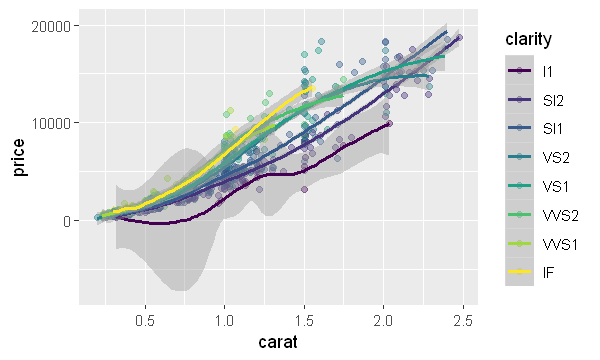

In [4]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=5, repr.plot.height=3)

# Make the points 40% opaque
ggplot(diamonds, aes(carat, price, color = clarity)) +
  geom_point(alpha = .4) +
  geom_smooth()

## 2) Aesthetics
Aesthetic mappings are the cornerstone of the grammar of graphics plotting concept. This is where the magic happens - converting continuous and categorical data into visual scales that provide access to a large amount of information in a very short time. In this chapter you’ll understand how to choose the best aesthetic mappings for your data.

### 2.1) (video) Visible aesthetics
in this section we will explore aesthetics, and understand how they are distinct from attributes, in ggplot2 the mapping of aesthetics elements is a key concept to master. so what does mean by mapping?

We will use aesthetics when making multivariate plots to maximize the number of variables we can add to a plot.

Typical visible aesthetics:

- x : x axis position
- y: y axis position
- fill: fill color
- color: color points, outilers of other geoms
- size: area or radius of points, thickness of lines
- alpha: transparency
- linetype: line dash pattern
- labels: text on plot or axes
- shape: shape

#### 2.1.1) All about aesthetics: color vs. fill
Typically, the `color` aesthetic changes the outline of a geom and the `fill` aesthetic changes the inside. `geom_point()` is an exception: you use `color` (not `fill`) for the point color. However, some shapes have special behavior.

The default `geom_point()` uses `shape = 19`: a solid circle. An alternative is `shape = 21`: a circle that allow you to use both fill for the inside and color for the outline. This is lets you to map two aesthetics to each point.

All shape values are described on the `points()` help page.


### 2.2) (video) Attributes
when we are referring how something looks we will refer to the `attributes` one of the most confusing part of ggplot2 is that all our visibles aesthetics also exist as attributes, they are always called in the `geom` layer 

#### 2.2.1) All about attributes: color, shape, size and alpha
This time you'll use these arguments to set `attributes` of the plot, not map variables onto `aesthetics`.

You can specify colors in R using hex codes: a hash followed by two hexadecimal numbers each for red, green, and blue ("#RRGGBB"). Hexadecimal is base-16 counting. You have 0 to 9, and A representing 10 up to F representing 15. Pairs of hexadecimal numbers give you a range from 0 to 255. "#000000" is "black" (no color), "#FFFFFF" means "white", and "#00FFFF" is cyan (mixed green and blue).

A hexadecimal color variable, my_blue has been defined for you.

#### 2.2.2) All about attributes: conflicts with aesthetics
You saw  that you can use all the aesthetics as  attributes. Let's see how this works with the aesthetics you used in the previous exercises: x, y, color, fill, size, alpha, label and shape.

**exercise**
- Use mtcars to draw a plot of qsec vs. mpg, colored by fcyl and Add a point layer.
- Add another aesthetic: map fam onto shape

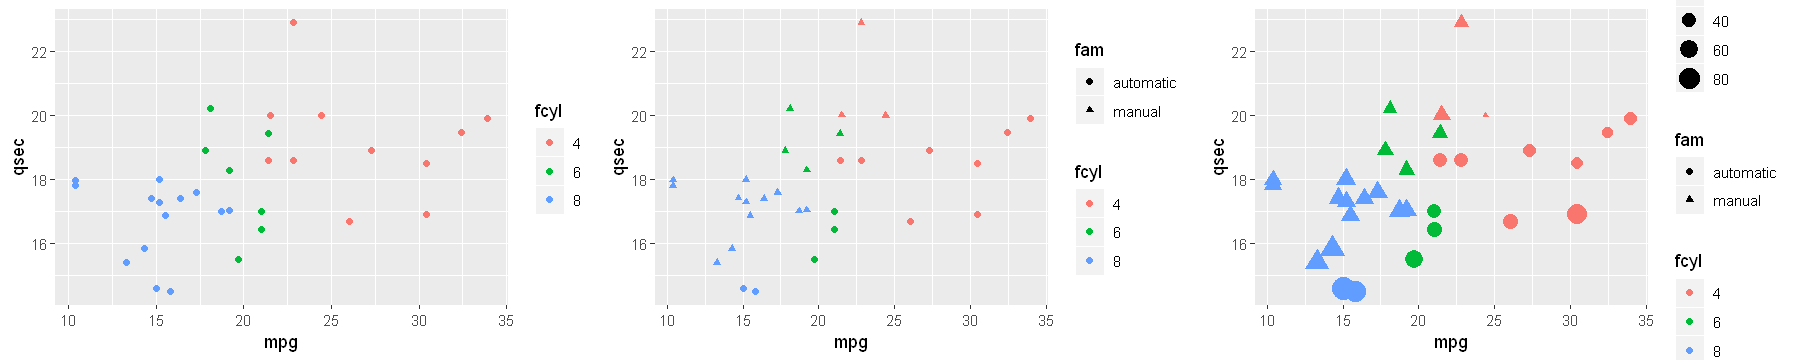

In [18]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=15, repr.plot.height=3)

# 3 aesthetics: qsec vs. mpg, colored by fcyl
a1<-ggplot(mtcars, aes(x = mpg, y = qsec, color = fcyl)) +
  geom_point()

a2<-ggplot(mtcars, aes(x = mpg, y = qsec, color = fcyl, shape = fam)) +
  geom_point()

a3<-# 5 aesthetics: add a mapping of size to hp / wt
ggplot(mtcars, aes(mpg, qsec, color = fcyl, shape = fam, size = hp/wt)) +
  geom_point()

grid.arrange(a1, a2,a3, nrow = 1)

### 2.3) (video) Modifying aesthetics
Now, we will study how we can modify our aesthetics.

A common configuration is the `position` that specifies how ggplot will be adjusted for bars or points superimposed on a single layer, for example (we have identity, dodge, stack, fill, fluctuate, fluctuate and push) the most direct identity is` `no Do nothing).

But perhaps due to our data, we could have overlap and not see the density, so we can add some variability to our data through `position=jitter`.

Other thing that we can modify is the `scale` through of the functions `scale_*`  eg 

- scale_x_continuous("Sepal Lenght", limits = c(2,8), breaque = seq(2.8,3)) , is the name of scale, limits describe the scale's range, breaks controls the tick mark position.

#### 2.3.1) Updating aesthetic labels
In this exercise, you'll modify some aesthetics to make a bar plot of the number of cylinders for cars with different types of transmission.

You'll also make use of some functions for improving the appearance of the plot.

-`labs()` to set the x- and y-axis labels. It takes strings for each argument.
-`scale_color_manual()` defines properties of the color scale (i.e. axis). The first argument sets the legend title. values is a named vector of colors to use.

**Exercise**

- Set the x-axis label to "Number of Cylinders", and the y-axis label to "Count" using the x and y arguments of labs(), respectively. 
- Implement a custom fill color scale using scale_fill_manual(). Set the first argument to "Transmission", and values to palette.
- Modify the code to set the position to dodge so that the bars for transmissions are displayed side by side.

*Answer*

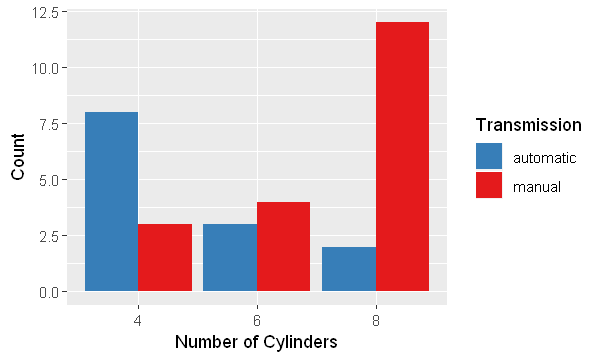

In [7]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=5, repr.plot.height=3)

palette <- c(automatic = "#377EB8", manual = "#E41A1C")

ggplot(mtcars, aes(fcyl, fill = fam)) +
  #position
  geom_bar(position = "dodge") +
  #Set the axis labels
  labs(x = "Number of Cylinders", y = "Count") +
  # Set the fill color scale
  scale_fill_manual("Transmission", values = palette)

## 3) Geometries
A plot’s geometry dictates what visual elements will be used. In this chapter, we’ll familiarize you with the geometries used in the three most common plot types you’ll encounter - scatter plots, bar charts and line plots. We’ll look at a variety of different ways to construct these plots.

### 3.1( video) Scatter Plots 

### 3.2( video) Histograms

### 3.3(video) Bar plots

### 3.1 (video) Line plots


## 4) Themes 
In this chapter, we’ll explore how understanding the structure of your data makes data visualization much easier. Plus, it’s time to make our plots pretty. This is the last step in the data viz process. The Themes layer will enable you to make publication quality plots directly in R. In the next course we'll look at some extra layers to add more variables to your plots

### 4.1) (video) Themes from scratch
the themes layer controls all the non-data ink on your plot, which are all visual elements that are not actually part of the data, visual elements can be classified as one of 3 different types.

- text
- type 
- rectangle 

each type can modified by using  the appropiate function, wich all begin with `element_` followed by text,type or rect, respectively.

for example the elements of text has a unique name, we can access all the text in general or one specific with `theme` function to modify one of them, just call its argument in the `theme` function and use the appropiate element_function to specify what we want to change.  e.g `theme(axis.title = element_text (color = "blue"))`

#### 4.1.1) Moving the legend
To change stylistic elements of a plot, call `theme()` and set plot properties to a new value. For example, the following changes the legend position.

    p + theme(legend.position = new_value)

Here, the new value can be

- "top", "bottom", "left", or "right'": place it at that side of the plot.
- "none": don't draw it.
- c(x, y): c(0, 0) means the bottom-left and c(1, 1) means the top-right.


#### 4.1.2) Modifying theme elements
Many plot elements have multiple properties that can be set. For example, line elements in the plot such as axes and gridlines have a color, a thickness (`size`), and a line type (solid line, dashed, or dotted). To set the style of a line, you use `element_line()`. For example, to make the axis lines into red, dashed lines, you would use the following.

    p + theme(axis.line = element_line(color = "red", linetype = "dashed"))
    
Similarly, `element_rect()` changes rectangles and `element_text()` changes text. You can remove a plot element using `element_blank()`.

#### 4.1.3) Modifying whitespace
**Whitespace** means all the non-visible margins and spacing in the plot.

To set a single whitespace value, use `unit(x, unit)`, where `x` is the amount and `unit` is the unit of measure.

Borders require you to set 4 positions, so use `margin(top, right, bottom, left, unit)`. To remember the margin order, think **TRouBLe**.

The default unit is "pt" (points), which scales well with text. Other options include "cm", "in" (inches) and "lines" (of text)

### 4.2) (video) Theme flexibility
previously you saw how to fine-tune every part our plot using `theme` leyer, there are other few ways of changing theme elements:

1) theme leyer object 
2) Built- in themes
3) Built in themes from other packages (packages as ggthemes or ggplot2)
4) Update/Set default theme, the command `theme_update(...)`

So we will start, define our own theme layer object,  so, once you settle on a specific theme, you will want to apply it all plots of the same type, the first method is to save our layer as an object (e.g theme_iris)

In addition to making your own themes, there are several out-of-the-box solutions that may save you lots of time.

- theme_gray() is the default.
- theme_bw() is useful when you use transparency.
- theme_classic() is more traditional.
- theme_void() removes everything but the data.


Now built-in theme functions begin with `theme_*` e.g (theme_classic())

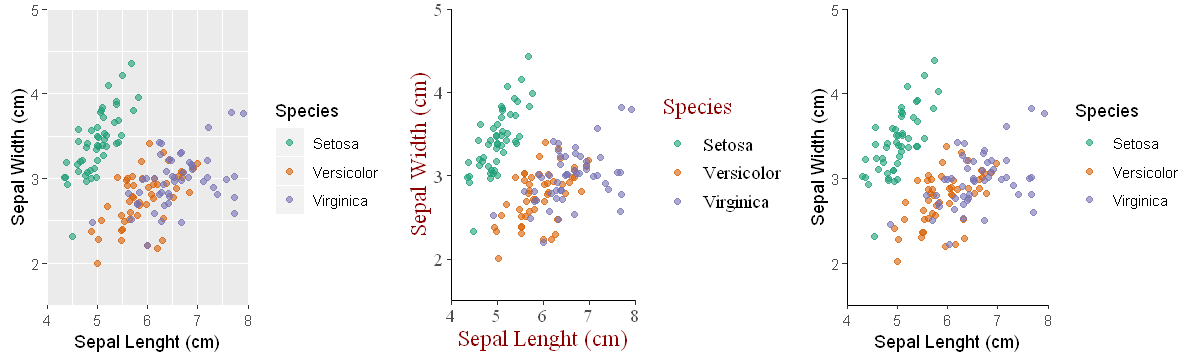

In [11]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=3)

z <- ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
geom_jitter(alpha = .6) + 
scale_x_continuous("Sepal Lenght (cm)", limits = c(4,8), expand = c(0,0)) +
scale_y_continuous("Sepal Width (cm)", limits = c(1.5,5), expand = c(0,0)) +
scale_color_brewer("Species", palette = "Dark2", labels = c("Setosa","Versicolor","Virginica"))


themes_iris<- theme(text = element_text(family = "serif", size = 14),
                    rect = element_blank(),
                    title = element_text(color = "#8b0000"),
                    axis.line = element_line(color = "black")
                   )

grid.arrange(z, z+themes_iris, z+ theme_classic(), nrow = 1)


### 4.3) (video) Effective explanatory plots

#### 4.3.1) Using geoms for explanatory plots

**Exercise**
- `geom_segment()` adds line segments and requires two additional aesthetics: xend and yend. To draw a horizontal line for each point, map 30 onto xend and country onto yend.
- geom_text also needs an additional aesthetic: label. Map lifeExp onto label, and set the attributes color to "white" and size to 1.5.
- The color scale has been set for you, but you need to clean up the scales. For the x scale:
    - Set expand to c(0, 0) and limits to c(30, 90).
    - Place the axis on the top of the plot with the position argument.
- Make sure to label the plot appropriately using labs():
    - Make the title "Highest and lowest life expectancies, 2007".
    - Add a reference by setting caption to "Source: gapminder".
    
*Answer*

In [3]:
library(gapminder)
gm2007<- filter(gapminder, year == 2007)


In [43]:
gm2007<-arrange(gm2007, desc(lifeExp))
top<-head(gm2007,10)
bottom<-tail(gm2007,10)
countries<-c(as.character(top$country),as.character(bottom$country))
gm2007<-select(gm2007, country, lifeExp, continent) %>% filter (country %in% countries)
gm2007$country <- factor(gm2007$country, levels = as.character(sort(unique(gm2007$country))))


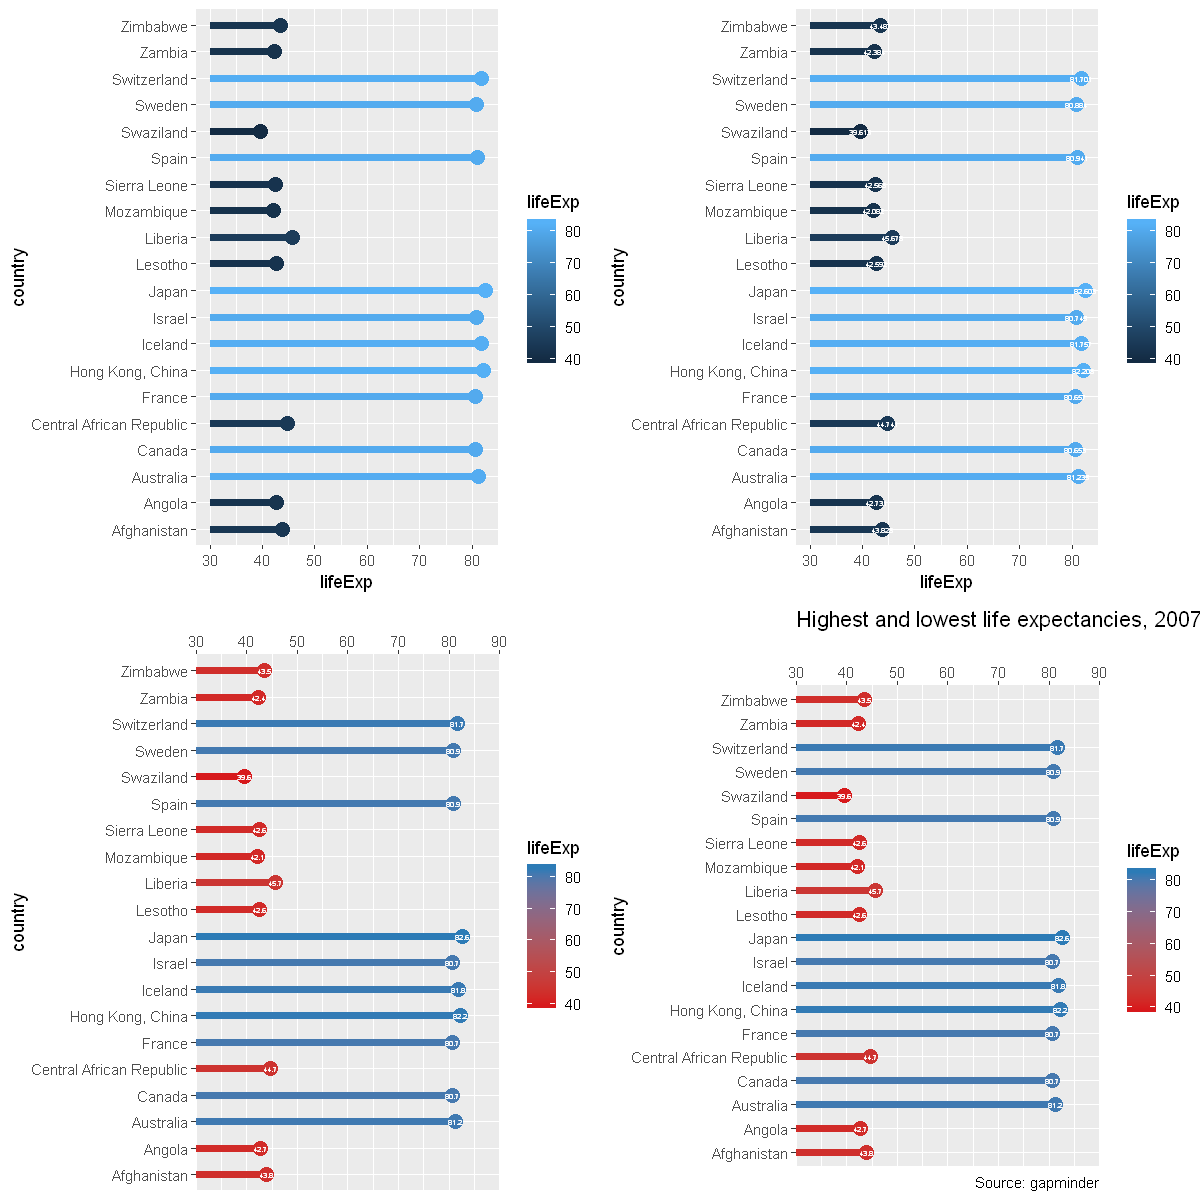

In [65]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=10)


# Add a geom_segment() layer
a<-ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2)

# Add a geom_text() layer
b<-ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2) +
  geom_text(aes(label = lifeExp), color = "white", size = 1.5)

library(RColorBrewer)
# Set the color scale
palette <- brewer.pal(5, "RdYlBu")[-(2:4)]
# Modify the scales
c<-ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2) +
  geom_text(aes(label = round(lifeExp,1)), color = "white", size = 1.5) +
  scale_x_continuous("", expand = c(0,0), limits = c(30,90), position = "top") +
  scale_color_gradientn(colors = palette)


# Set the color scale
palette <- brewer.pal(5, "RdYlBu")[-(2:4)]

# Add a title and caption
plt_country_vs_lifeExp<-ggplot(gm2007, aes(x = lifeExp, y = country, color = lifeExp)) +
  geom_point(size = 4) +
  geom_segment(aes(xend = 30, yend = country), size = 2) +
  geom_text(aes(label = round(lifeExp,1)), color = "white", size = 1.5) +
  scale_x_continuous("", expand = c(0,0), limits = c(30,90), position = "top") +
  scale_color_gradientn(colors = palette) +
  labs(title = "Highest and lowest life expectancies, 2007", caption = "Source: gapminder")


grid.arrange(a,b,c,plt_country_vs_lifeExp, nrow = 2)

#### 4.3.2) Using annotate() for embellishments
In the previous exercise, we completed our basic plot. Now let's polish it by playing with the theme and adding annotations. In this exercise, you'll use `annotate()` to add text and a curve to the plot.

The following values have been calculated for you to assist with adding embellishments to the plot:

**Exercise**
- Clean up the theme:
    - Add a classic theme to the plot with theme_classic().
    - Set axis.line.y, axis.ticks.y, and axis.title to element_blank().
    - Set the axis.text color to "black".
    - Remove the legend by setting legend.position to "none".
- Use geom_vline() to add a vertical line. Set xintercept to global_mean, specify the color to be "grey40", and set linetype to 3.
- x_start and y_start will be used as positions to place text and have been calculated for you.
    - Add a "text" geom as an annotation.
    - For the annotation, set x to x_start, y to y_start, and label to "The\nglobal\naverage".
- Annotate the plot with an arrow connecting your text to the line.
    - Use a "curve" geom.
    - Set the arrow ends xend to x_end and yend to y_end.
    - Set the length of the arrowhead to 0.2 cm and the type to "closed".


*Answer*

In [67]:
global_mean <- mean(gm2007$lifeExp)
x_start <- global_mean + 4
y_start <- 5.5
x_end <- global_mean
y_end <- 7.5

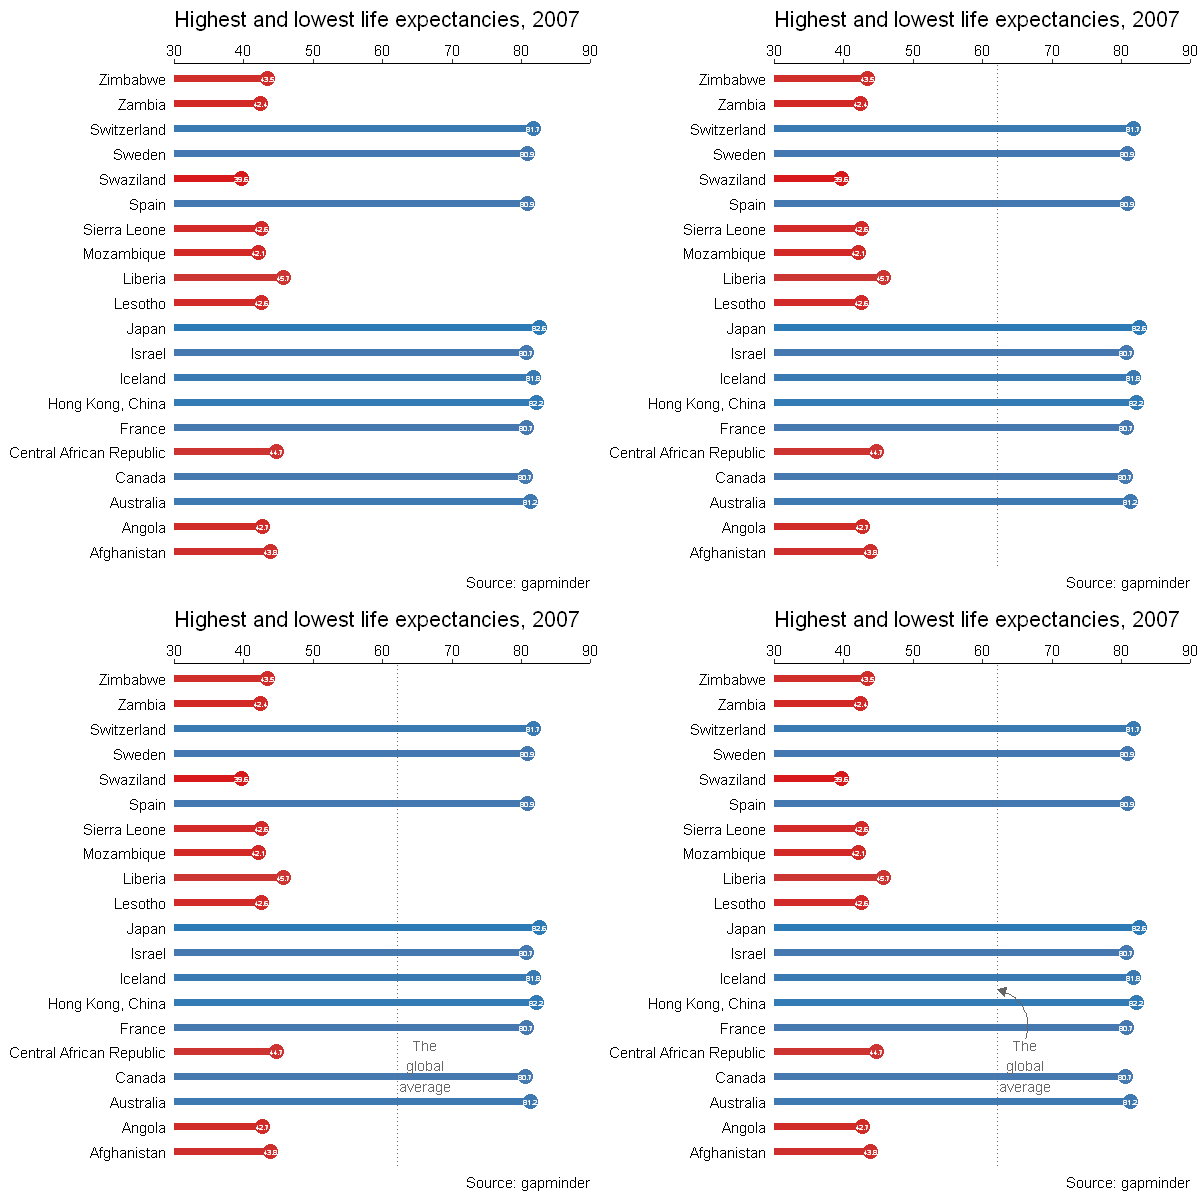

In [72]:
library(repr)
# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=10)

# Define the theme
step_1_themes<- theme_classic() +
  theme(axis.line.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text = element_text(color = "black"),
        axis.title = element_blank(),
        legend.position = "none")

# Add a vertical line
b<-plt_country_vs_lifeExp +
  step_1_themes +
  geom_vline(xintercept = global_mean , color = "grey40", linetype = 3)

# Add text
c<-plt_country_vs_lifeExp +
  step_1_themes +
  geom_vline(xintercept = global_mean, color = "grey40", linetype = 3) +
  annotate(
    "text",
    x = x_start, y = y_start,
    label = "The\nglobal\naverage",
    vjust = 1, size = 3, color = "grey40"
  )


# Add a curve
d<-plt_country_vs_lifeExp +
  step_1_themes +
  geom_vline(xintercept = global_mean, color = "grey40", linetype = 3) +
    annotate(
    "text",
    x = x_start, y = y_start,
    label = "The\nglobal\naverage",
    vjust = 1, size = 3, color = "grey40") +
  annotate(
    "curve",
    x = x_start, y = y_start,
    xend = x_end, yend = y_end,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey40"
  )



grid.arrange(plt_country_vs_lifeExp + step_1_themes , b, c,d, nrow = 2)

**Exercise**

*Answer*